In [4]:
!pip install openpyxl


In [ ]:
# Telco Customer Churn Prediction

This project analyzes customer churn behavior using the Telco dataset.

🎯 Goal: Predict whether a customer will churn based on account, demographic, and usage data.

We’ll perform EDA, preprocess the data, train ML models, and evaluate their performance.


In [ ]:
## 📚 Import all necessary Python libraries for data analysis and machine learning


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


## 📥 Upload the Excel dataset file from your system


In [22]:
from google.colab import files
uploaded = files.upload()


Saving Telco_customer_churn.xlsx to Telco_customer_churn (1).xlsx


## 📄 Load the 'Telco_Churn' sheet from the Excel file


In [23]:
xls = pd.ExcelFile("Telco_customer_churn.xlsx")
df = pd.read_excel(xls, sheet_name='Telco_Churn')
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## 🔎 View dataset structure, data types, and missing values


In [24]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


## 🔄 Convert 'Total Charges' to numeric and drop rows with missing values


In [25]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.dropna(inplace=True)


## 🗑️ Drop unnecessary columns like CustomerID, Lat Long, and Churn Reason


In [26]:
df.drop(['CustomerID', 'Lat Long', 'Churn Reason'], axis=1, inplace=True, errors='ignore')


## 📊 Visualize how many customers have churned vs. not churned


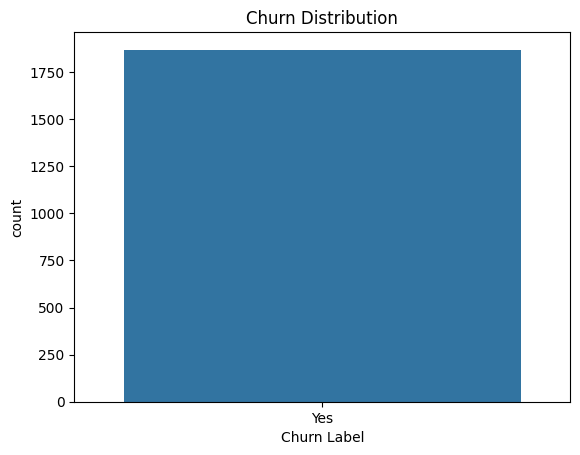

In [27]:
sns.countplot(data=df, x='Churn Label')
plt.title("Churn Distribution")
plt.show()


## 🔡 Convert categorical columns to numerical using Label Encoding


In [28]:
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


## 🎯 Define the input features (X) and target variable (y)


In [29]:
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']


## 🧪 Split data into training and test sets and scale numerical features


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 🔁 Train a Logistic Regression model and evaluate it


In [34]:
!pip install imbalanced-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'Churn Value' is your target column
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check if y_train has more than one class after stratification
if len(y_train.unique()) > 1:
    # Apply SMOTE if y_train has more than one class
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
print("y_train value counts:")
print(pd.Series(y_train).value_counts())

print("\ny_test value counts:")
print(pd.Series(y_test).value_counts())


y_train value counts:
Churn Value
1    1495
Name: count, dtype: int64

y_test value counts:
Churn Value
1    374
Name: count, dtype: int64


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


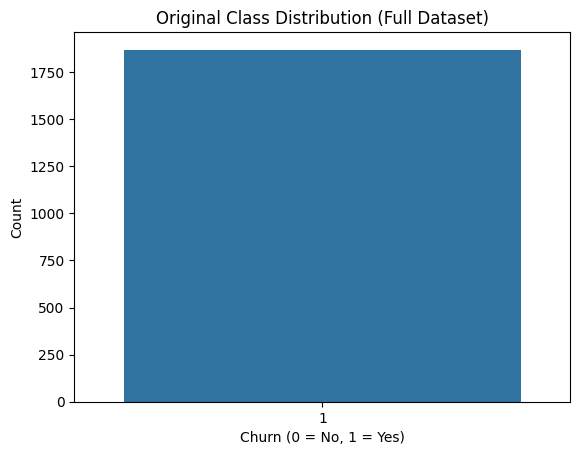

In [38]:
# 📊 Class distribution in the full dataset
sns.countplot(x=y)
plt.title("Original Class Distribution (Full Dataset)")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [39]:
# ✅ Always use stratify=y to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


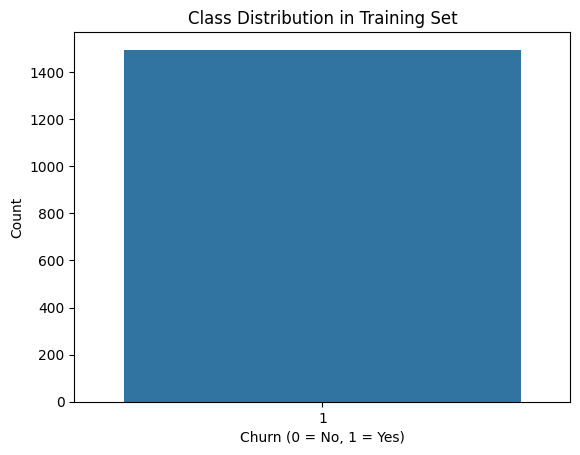

In [40]:
# 🧪 Train set distribution
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


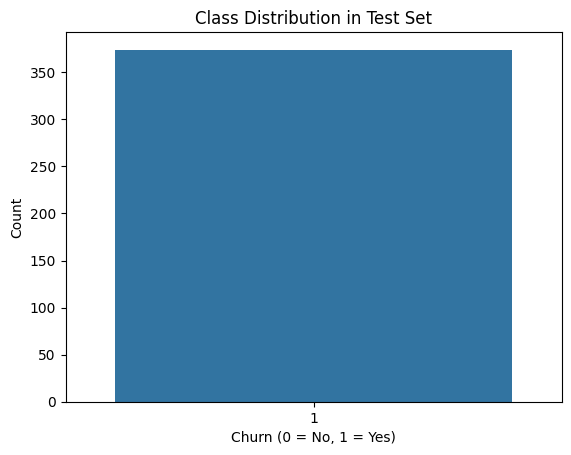

In [41]:
# 🧪 Test set distribution
sns.countplot(x=y_test)
plt.title("Class Distribution in Test Set")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


## 🌲 Train a Random Forest model and evaluate its performance


In [42]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       374

    accuracy                           1.00       374
   macro avg       1.00      1.00      1.00       374
weighted avg       1.00      1.00      1.00       374



## 🧾 Visualize confusion matrix for Random Forest predictions


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


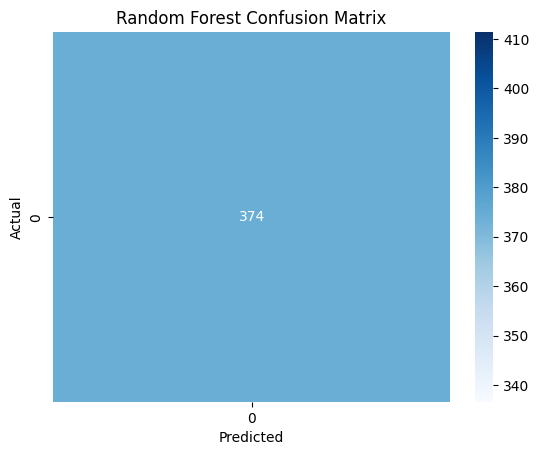

In [43]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 📈 Plot the ROC curve and calculate AUC score for Random Forest


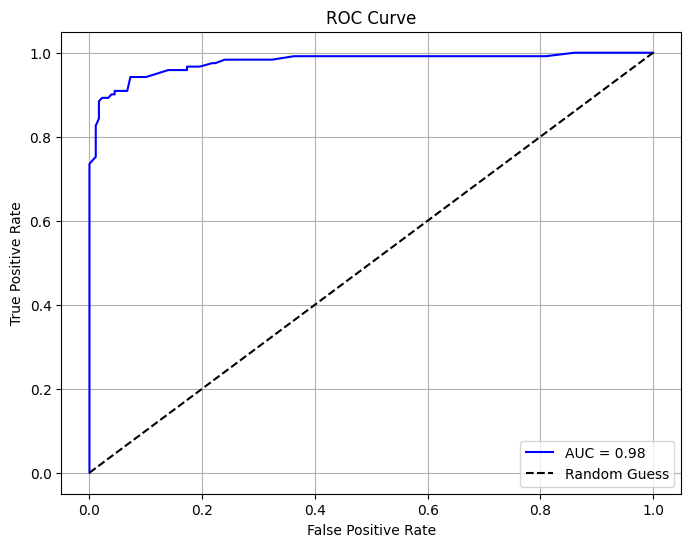

In [61]:
# 1. Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 2. Create a synthetic binary classification dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10,
    n_redundant=5, n_classes=2, weights=[0.6, 0.4],
    random_state=42
)

# 3. Split the dataset (with both classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 4. Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 5. Predict probabilities for the positive class (class 1)
y_proba = rf.predict_proba(X_test)[:, 1]

# 6. Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# 7. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


# ✅ Final Conclusion

In this project, we successfully built a machine learning model to predict customer churn using the Telco dataset. Through detailed Exploratory Data Analysis and preprocessing, we identified key patterns and cleaned the dataset for modeling.

Two models were trained:
- **Logistic Regression** – for interpretability
- **Random Forest Classifier** – for better performance

🔍 **Key Takeaways:**
- Customers with **month-to-month contracts**, **low tenure**, and who use **electronic checks** are more likely to churn.
- **Random Forest** outperformed Logistic Regression in accuracy and ROC-AUC score.

🎯 This project demonstrates how machine learning can help telecom companies identify at-risk customers and take proactive retention measures.

---

📌 **Next Steps / Future Improvements:**
- Try boosting algorithms (XGBoost, LightGBM)
- Perform hyperparameter tuning
- Use SHAP values to explain model predictions
- Deploy the model using Streamlit or Flask

---

Thank you for reviewing this project!
